In [57]:
import pandas as pd
import requests
import io

# download csv from git to my mac
'''
url = "https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv"
download = requests.get(url).content

test_df = pd.read_csv(io.StringIO(download.decode('utf-8')))
print(test_df.head())
test_df.to_csv('oxford_strigency.csv')
'''

'\nurl = "https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv"\ndownload = requests.get(url).content\n\ntest_df = pd.read_csv(io.StringIO(download.decode(\'utf-8\')))\nprint(test_df.head())\ntest_df.to_csv(\'oxford_strigency.csv\')\n'

In [58]:
from mysql.connector import MySQLConnection, Error
import pandas as pd
from sqlalchemy import create_engine 
import pymysql

from connection_config import read_db_config

In [59]:
conn_string,ssl_args = read_db_config('teama.teama')
engine = create_engine(conn_string,connect_args=ssl_args)

Import oxford strigency data

In [60]:
# oxford_stringency_df = pd.read_csv('/Users/Nina/Documents/GitHub/Big-Data-Challenge-Team-A/oxford_strigency.csv',header = 0)
# oxford_stringency_df.to_sql('oxford_stringency_raw',con = engine,if_exists = 'fail')

Import diesel and petrol data for 2020 taken from https://www.gov.uk/government/statistics/road-fuel-sales-and-stock-levels-9-august-2020 

In [61]:
# diesel_and_petrol_sales_2020_df = pd.read_csv('/Users/Nina/Documents/Big-Data-Challenge-Team-A/Nina_data/Petrol_and_diesel_sales_2020.csv',header = 0)
# diesel_and_petrol_sales_2020_df.to_sql('diesel_and_petrol_sales_2020_df_raw',con = engine,if_exists = 'fail')

In [100]:
# accessing dataframe from the cloud
petrol_and_diesel_df = pd.read_sql('SELECT * FROM diesel_and_petrol_sales_2020_df_raw', con=engine)
oxford_stringency_df = pd.read_sql('SELECT * FROM oxford_stringency_raw', con=engine)

Check in which format the data is provided. The date column is not in datetime format, but a string, so I'll change that. 

In [63]:
a = petrol_and_diesel_df.loc[5,'Date']
type(a)
# petrol_and_diesel_df.head()

index        Date    Weekday Fuel Type     Total
0      0  27/01/2020     Monday    Diesel   11,276 
1      1  28/01/2020    Tuesday    Diesel   11,546 
2      2  29/01/2020  Wednesday    Diesel   11,463 
3      3  30/01/2020   Thursday    Diesel   11,397 
4      4  31/01/2020     Friday    Diesel   11,894

In [64]:
# convert the 'Date' column to datetime format 
petrol_and_diesel_df['Date']= pd.to_datetime(petrol_and_diesel_df['Date'], format='%d/%m/%Y') 
# check again format
a = petrol_and_diesel_df.loc[5,'Date']
type(a)

pandas._libs.tslibs.timestamps.Timestamp

Check format of total. It's a string again, so change it to float

In [65]:
a = petrol_and_diesel_df.loc[5,'Total']
type(a)


str

In [66]:
petrol_and_diesel_df['Total'] = petrol_and_diesel_df['Total'].replace(',','', regex=True)
petrol_and_diesel_df['Total']= pd.to_numeric(petrol_and_diesel_df['Total'], downcast='float') 
a = petrol_and_diesel_df.loc[5,'Total']
type(a)

numpy.float32

Split dataframe into two dataframes, one for diesel data and one for petrol data


In [67]:
diesel_df = petrol_and_diesel_df[petrol_and_diesel_df['Fuel Type'] == 'Diesel']
petrol_df = petrol_and_diesel_df[petrol_and_diesel_df['Fuel Type'] == 'Petrol']


Plot both diesel and petrol sales in one figure

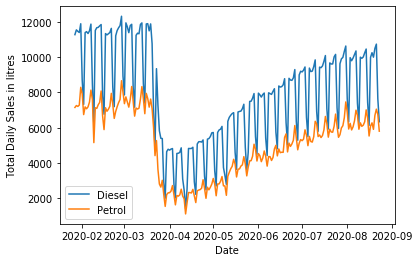

In [99]:

import matplotlib.pyplot as plt
# diesel_df.plot(x ='Date', y='Total', kind = 'line')

fig = plt.figure()

plt.plot(diesel_df['Date'], diesel_df['Total'], label='Diesel')
plt.plot(petrol_df['Date'], petrol_df['Total'], label='Petrol')

plt.xlabel('Date')
plt.ylabel('Total Daily Sales in litres')
plt.legend()


plt.show()


Now include the Oxford Stringeny index. First, we check the dataframe and realise we only need UK data.

In [145]:
oxford_stringency_df['Date']= pd.to_datetime(oxford_stringency_df['Date'], format='%Y%m%d')
oxford_uk_df = oxford_stringency_df[oxford_stringency_df['CountryCode'] == 'GBR']
oxford_uk_noregion_df = oxford_uk_df[oxford_uk_df['RegionName'].isnull()]

index  Unnamed: 0     CountryName CountryCode RegionName RegionCode  \
15616  15616       15616  United Kingdom         GBR       None       None   
15617  15617       15617  United Kingdom         GBR       None       None   
15618  15618       15618  United Kingdom         GBR       None       None   
15619  15619       15619  United Kingdom         GBR       None       None   
15620  15620       15620  United Kingdom         GBR       None       None   
...      ...         ...             ...         ...        ...        ...   
15867  15867       15867  United Kingdom         GBR       None       None   
15868  15868       15868  United Kingdom         GBR       None       None   
15869  15869       15869  United Kingdom         GBR       None       None   
15870  15870       15870  United Kingdom         GBR       None       None   
15871  15871       15871  United Kingdom         GBR       None       None   

            Date  C1_School closing  C1_Flag  C2_Workplace closing  ...  \
15616 2020-01-01                0.0      NaN                   0.0  ...   
15617 2020-01-02                0.0      NaN                   0.0  ...   
15618 2020-01-03                0.0      NaN                   0.0  ...   
15619 2020-01-04                0.0      NaN                   0.0  ...   
15620 2020-01-05                0.0      NaN                   0.0  ...   
...          ...                ...      ...                   ...  ...   
15867 2020-09-08                NaN      NaN                   NaN  ...   
15868 2020-09-09                NaN      NaN                   NaN  ...   
15869 2020-09-10                NaN      NaN                   NaN  ...   
15870 2020-09-11                NaN      NaN                   NaN  ...   
15871 2020-09-12                NaN      NaN                   NaN  ...   

       StringencyIndex  StringencyIndexForDisplay  StringencyLegacyIndex  \
15616              0.0                       0.00                    0.0   
15617              0.0                       0.00                    0.0   
15618              0.0                       0.00                    0.0   
15619              0.0                       0.00                    0.0   
15620              0.0                       0.00                    0.0   
...                ...                        ...                    ...   
15867              NaN                      64.35                    NaN   
15868              NaN                      64.35                    NaN   
15869              NaN                      64.35                    NaN   
15870              NaN                      64.35                    NaN   
15871              NaN                      64.35                    NaN   

       StringencyLegacyIndexForDisplay  GovernmentResponseIndex  \
15616                             0.00                      0.0   
15617                             0.00                      0.0   
15618                             0.00                      0.0   
15619                             0.00                      0.0   
15620                             0.00                      0.0   
...                                ...                      ...   
15867                            72.62                      NaN   
15868                            72.62                      NaN   
15869                            72.62                      NaN   
15870                            72.62                      NaN   
15871                            72.62                      NaN   

       GovernmentResponseIndexForDisplay  ContainmentHealthIndex  \
15616                               0.00                     0.0   
15617                               0.00                     0.0   
15618                               0.00                     0.0   
15619                               0.00                     0.0   
15620                               0.00                     0.0   
...                                  ...   

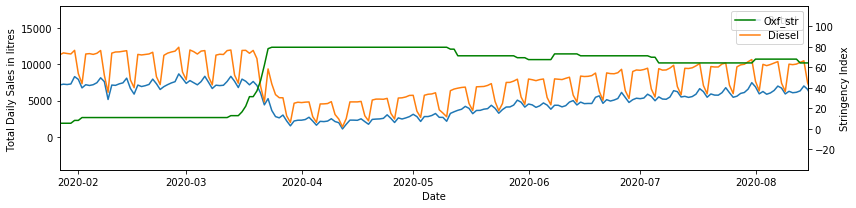

In [168]:
'''
fig1 = plt.figure()

plt.plot(diesel_df['Date'], diesel_df['Total'], label='Diesel')
plt.plot(petrol_df['Date'], petrol_df['Total'], label='Petrol')
plt.plot(oxford_uk_df['Date'], oxford_uk_df['StringencyIndex'])

plt.xlabel('Date')
plt.ylabel('Total Daily Sales in litres')
plt.legend()


plt.show()
'''
import datetime
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,3))

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Daily Sales in litres ')
ax1.plot(petrol_df['Date'], petrol_df['Total'], label='Petrol')
ax1.plot(diesel_df['Date'], diesel_df['Total'], label='Diesel')
plt.legend()
ax1.margins(0, 0.5) 
# ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Stringency Index')  # we already handled the x-label with ax1
ax2.plot(oxford_uk_noregion_df['Date'], oxford_uk_noregion_df['StringencyIndex'], label ='Oxf_str', color='green')
ax2.margins(0, 0.5) 
# ax2.tick_params(axis='y')

plt.legend()
plt.tight_layout()
ax1.set_xlim([datetime.date(2020, 1, 27), datetime.date(2020, 8, 15)])
plt.show()
